# Analysis of IMDB Data

We will analyze a subset of IMDB's actors, genres, movie actors, and movie ratings data. This dataset comes to us from Kaggle (https://www.kaggle.com/datasets/ashirwadsangwan/imdb-dataset) although we have taken steps to pull this data into a publis s3 bucket: 

* s3://cis9760-lecture9-movieanalysis/name.basics.tsv ---> (actors)
* s3://cis9760-lecture9-movieanalysis/title.basics.tsv ---> (genres)
* s3://cis9760-lecture9-movieanalysis/title.principals.tsv ---> (movie actors)
* s3://cis9760-lecture9-movieanalysis/title.ratings.tsv ---> (movie ratings)

# Content

**<br />name.basics.tsv.gz – Contains the following information for names:**
<br />nconst (string) - alphanumeric unique identifier of the name/person.
<br />primaryName (string)– name by which the person is most often credited.
<br />birthYear – in YYYY format.
<br />deathYear – in YYYY format if applicable, else .
<br />primaryProfession (array of strings)– the top-3 professions of the person.
<br />knownForTitles (array of tconsts) – titles the person is known for.
<br/><br/>
**<br />title.basics.tsv.gz - Contains the following information for titles:**
<br />tconst (string) - alphanumeric unique identifier of the title.
<br />titleType (string) – the type/format of the title (e.g. movie, short, tvseries, tvepisode, video, etc).
<br />primaryTitle (string) – the more popular title / the title used by the filmmakers on promotional materials at the point of release.
<br />originalTitle (string) - original title, in the original language.
<br />isAdult (boolean) - 0: non-adult title; 1: adult title.
<br />startYear (YYYY) – represents the release year of a title. In the case of TV Series, it is the series start year.
<br />endYear (YYYY) – TV Series end year. for all other title types.
<br />runtimeMinutes – primary runtime of the title, in minutes.
<br />genres (string array) – includes up to three genres associated with the title.
<br/><br/>
**<br />title.principals.tsv – Contains the principal cast/crew for titles:**
<br />tconst (string) - alphanumeric unique identifier of the title.
<br />ordering (integer) – a number to uniquely identify rows for a given titleId.
<br />nconst (string) - alphanumeric unique identifier of the name/person.
<br />category (string) - the category of job that person was in.
<br />job (string) - the specific job title if applicable, else.
<br />characters (string) - the name of the character played if applicable, else.
<br/><br/>
**<br />title.ratings.tsv.gz – Contains the IMDb rating and votes information for titles:**
<br />tconst (string) - alphanumeric unique identifier of the title.
<br />averageRating – weighted average of all the individual user ratings.
<br />numVotes - number of votes the title has received.

# PART 1 - Installation and Initial Setup

Begin by installing the necessary libraries that you may need to conduct your analysis. At the very least, you must install pandas and matplotlib

In [1]:
%%info

Let's install the necessary packages here

In [2]:
sc.install_pypi_package("pandas==1.0.3")
sc.install_pypi_package("matplotlib==3.2.1")

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
1,application_1668794938691_0002,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached https://files.pythonhosted.org/packages/4a/6a/94b219b8ea0f2d580169e85ed1edc0163743f55aaeca8a44c2e8fc1e344e/pandas-1.0.3-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/36/7a/87837f39d0296e723bb9b62bbb257d0355c7f6128853c78955f57342a56d/python_dateutil-2.8.2-py2.py3-none-any.whl

  Using cached https://files.pythonhosted.org/packages/b2/c2/71fcf957710f3ba1f09088b35776a799ba7dd95f7c2b195ec800933b276b/matplotlib-3.2.1-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/6c/10/a7d0fa5baea8fe7b50f448ab742f26f52b80bfca85ac2be9d35cdd9a3246/pyparsing-3.0.9-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/5c/f9/695d6bedebd747e5eb0fe8fad57b72fdf25411273a39791cde838d5a8f51/cycler-0.11.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/ab/8f/8dbe2d4efc4c0b08ec67d6efb7cc31fbfd688c80afad85f65980633b0d37/kiwisolver-1.4.4-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_

Now, import the installed packages from the previous block below.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyspark.sql.functions import col, lit

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

# Loading Data

Load all data from S3 into a Spark dataframe object 

In [4]:
actors = spark.read.csv('s3://cis9760-lecture9-movieanalysis/name.basics.tsv', sep=r'\t', header=True)
basics = spark.read.csv('s3://cis9760-lecture9-movieanalysis/title.basics.tsv', sep=r'\t', header=True)
principals = spark.read.csv('s3://cis9760-lecture9-movieanalysis/title.principals.tsv', sep=r'\t', header=True)
ratings = spark.read.csv('s3://cis9760-lecture9-movieanalysis/title.ratings.tsv', sep=r'\t', header=True)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## Actors

Display the schema below:

In [5]:
actors.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- nconst: string (nullable = true)
 |-- primaryName: string (nullable = true)
 |-- birthYear: string (nullable = true)
 |-- deathYear: string (nullable = true)
 |-- primaryProfession: string (nullable = true)
 |-- knownForTitles: string (nullable = true)

Display the first 5 rows with the following columns:

* `primaryName`
* `birthYear`
* `deathYear`
* `knownForTitles`

In [6]:
actors.select('primaryName','birthYear','deathYear','knownForTitles').show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------------+---------+---------+--------------------+
|    primaryName|birthYear|deathYear|      knownForTitles|
+---------------+---------+---------+--------------------+
|   Fred Astaire|     1899|     1987|tt0050419,tt00531...|
|  Lauren Bacall|     1924|     2014|tt0071877,tt01170...|
|Brigitte Bardot|     1934|       \N|tt0054452,tt00491...|
|   John Belushi|     1949|     1982|tt0077975,tt00725...|
| Ingmar Bergman|     1918|     2007|tt0069467,tt00509...|
+---------------+---------+---------+--------------------+
only showing top 5 rows

## Genres

Display the first 10 rows with the following columns:
    
* `titleType`
* `primaryTitle`
* `genres`

In [7]:
basics.select('titleType','primaryTitle','genres').show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+--------------------+--------------------+
|titleType|        primaryTitle|              genres|
+---------+--------------------+--------------------+
|    short|          Carmencita|   Documentary,Short|
|    short|Le clown et ses c...|     Animation,Short|
|    short|      Pauvre Pierrot|Animation,Comedy,...|
|    short|         Un bon bock|     Animation,Short|
|    short|    Blacksmith Scene|        Comedy,Short|
|    short|   Chinese Opium Den|               Short|
|    short|Corbett and Court...|         Short,Sport|
|    short|Edison Kinetoscop...|   Documentary,Short|
|    movie|          Miss Jerry|             Romance|
|    short| Exiting the Factory|   Documentary,Short|
+---------+--------------------+--------------------+
only showing top 10 rows

Display the unique categories below:

In [8]:
basics.select("titleType").distinct().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------+
|   titleType|
+------------+
|    tvSeries|
|tvMiniSeries|
|       movie|
|   videoGame|
|   tvSpecial|
|       video|
|     tvMovie|
|   tvEpisode|
|     tvShort|
|       short|
+------------+

Display the schema below:

In [9]:
basics.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- tconst: string (nullable = true)
 |-- titleType: string (nullable = true)
 |-- primaryTitle: string (nullable = true)
 |-- originalTitle: string (nullable = true)
 |-- isAdult: string (nullable = true)
 |-- startYear: string (nullable = true)
 |-- endYear: string (nullable = true)
 |-- runtimeMinutes: string (nullable = true)
 |-- genres: string (nullable = true)

## Movie Actors

Display the schema below:

In [10]:
principals.printSchema()


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- tconst: string (nullable = true)
 |-- ordering: string (nullable = true)
 |-- nconst: string (nullable = true)
 |-- category: string (nullable = true)
 |-- job: string (nullable = true)
 |-- characters: string (nullable = true)

Display the first 10 rows below

In [11]:
principals.show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+--------+---------+---------------+--------------------+-----------+
|   tconst|ordering|   nconst|       category|                 job| characters|
+---------+--------+---------+---------------+--------------------+-----------+
|tt0000001|       1|nm1588970|           self|                  \N|["Herself"]|
|tt0000001|       2|nm0005690|       director|                  \N|         \N|
|tt0000001|       3|nm0374658|cinematographer|director of photo...|         \N|
|tt0000002|       1|nm0721526|       director|                  \N|         \N|
|tt0000002|       2|nm1335271|       composer|                  \N|         \N|
|tt0000003|       1|nm0721526|       director|                  \N|         \N|
|tt0000003|       2|nm5442194|       producer|            producer|         \N|
|tt0000003|       3|nm1335271|       composer|                  \N|         \N|
|tt0000003|       4|nm5442200|         editor|                  \N|         \N|
|tt0000004|       1|nm0721526|       dir

## Movie Ratings

Display the schema below:

In [12]:
ratings.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- tconst: string (nullable = true)
 |-- averageRating: string (nullable = true)
 |-- numVotes: string (nullable = true)

Display the first 10 rows in a descending order by the number of votes

In [13]:
ratings.sort(col("numVotes").desc(),col("tconst").asc()).show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+-------------+--------+
|   tconst|averageRating|numVotes|
+---------+-------------+--------+
|tt7430722|          6.8|    9999|
|tt4445154|          8.1|    9997|
|tt2229907|          6.3|    9996|
|tt0294097|          8.0|    9994|
|tt0264734|          6.5|    9993|
|tt2032572|          5.2|    9991|
|tt8860450|          6.3|    9991|
|tt0025173|          6.6|     999|
|tt0062155|          6.9|     999|
|tt0062690|          6.1|     999|
+---------+-------------+--------+
only showing top 10 rows

# Overview of Data

Display the number of rows and columns in each dataFrame object.

In [14]:
print(f'Number of columns in Actors table:{len(actors.dtypes)}')
print(f'Number of rows in Actors table:{actors.count()}\n')

print(f'Number of columns in Genres table:{len(basics.dtypes)}')
print(f'Number of rows in Genres table:{basics.count()}\n')

print(f'Number of columns in Movie Actors table:{len(principals.dtypes)}')
print(f'Number of rows in Movie Actors table:{principals.count()}\n')

print(f'Number of columns in Movie Ratings table:{len(ratings.dtypes)}')
print(f'Number of rows in Movie Ratings table:{ratings.count()}\n')


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Number of columns in Actors table:6
Number of rows in Actors table:9706922

Number of columns in Genres table:9
Number of rows in Genres table:6321302

Number of columns in Movie Actors table:6
Number of rows in Movie Actors table:36468817

Number of columns in Movie Ratings table:3
Number of rows in Movie Ratings table:993153

# PART 2 - Analyzing Genres

Let's now answer this question: how many unique genres are represented in this dataset?

Essentially, we have the genres per movie as a list - this is useful to quickly see what each movie might be represented as but it is difficult to easily answer questions such as:

* How many movies are categorized as Comedy, for instance?
* What are the top 20 most popular genres available?

## Association Table

We need to "break out" these genres from the tconst? One common approach to take is to build an association table mapping a single tconst multiple times to each distinct genre.

For instance, given the following:


| tconst   | titleType  |genres |
|----------|------------|-------|
| abcd123  | XXX        |a,b,c  |

We would like to derive something like:

| tconst   |  titleType |genre |
|----------|------------|------|
| abcd123  | XXX        |a     |
| abcd123  | XXX        |b     |
| abcd123  | XXX        |c     |


What this does is allow us to then perform a myriad of rollups and other analysis on this association table which can aid us in answering the questions asked above.

Implement the code necessary to derive the table described from the data set

In [15]:
basics.select('tconst','titleType','genres').show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+---------+--------------------+
|   tconst|titleType|              genres|
+---------+---------+--------------------+
|tt0000001|    short|   Documentary,Short|
|tt0000002|    short|     Animation,Short|
|tt0000003|    short|Animation,Comedy,...|
|tt0000004|    short|     Animation,Short|
|tt0000005|    short|        Comedy,Short|
+---------+---------+--------------------+
only showing top 5 rows

Display the first 10 rows of your association table below

In [16]:
from pyspark.sql.functions import split, explode
df_genre = basics.withColumn('genre',explode(split('genres',',')))
df_genre=df_genre.select('tconst','titleType','genre')
df_genre.show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+---------+-----------+
|   tconst|titleType|      genre|
+---------+---------+-----------+
|tt0000001|    short|Documentary|
|tt0000001|    short|      Short|
|tt0000002|    short|  Animation|
|tt0000002|    short|      Short|
|tt0000003|    short|  Animation|
|tt0000003|    short|     Comedy|
|tt0000003|    short|    Romance|
|tt0000004|    short|  Animation|
|tt0000004|    short|      Short|
|tt0000005|    short|     Comedy|
+---------+---------+-----------+
only showing top 10 rows

## Total Unique Genres

**What is the total number of unique genres available in the movie category?**

In [17]:
df_genre.createOrReplaceTempView("genre")
unique = spark.sql(
'''
SELECT DISTINCT(genre)
FROM genre
''')

unique.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

29

**What are the unique genres available?**

In [18]:
unique.show(20,truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+
|genre      |
+-----------+
|Mystery    |
|Musical    |
|Sport      |
|Action     |
|Talk-Show  |
|Romance    |
|Thriller   |
|\N         |
|Reality-TV |
|Family     |
|Fantasy    |
|History    |
|Animation  |
|Film-Noir  |
|Short      |
|Sci-Fi     |
|News       |
|Drama      |
|Documentary|
|Western    |
+-----------+
only showing top 20 rows

**Oops! Something is off!**

In [19]:
unique.filter(unique.genre != "\\N").show(20,truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+
|genre      |
+-----------+
|Mystery    |
|Musical    |
|Sport      |
|Action     |
|Talk-Show  |
|Romance    |
|Thriller   |
|Reality-TV |
|Family     |
|Fantasy    |
|History    |
|Animation  |
|Short      |
|Film-Noir  |
|Sci-Fi     |
|News       |
|Drama      |
|Documentary|
|Western    |
|Comedy     |
+-----------+
only showing top 20 rows

In [20]:
unique.filter(unique.genre != "\\N").count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

28

## Top Genres by Movies

Now let's find the highest rated genres in this dataset by rolling up genres.

### Average Rating / Genre

So now, let's unroll our distinct count a bit and display the per average rating value of per genre.

The expected output should be:

| genre | averageRating |
|-------------|------------|
| a     | 8.5         |
| b     | 6.3         |
| c     | 7.2         |

Or something to that effect.

First, let's join our two dataframes (movie ratings and genres) by tconst

In [21]:
ratings.createOrReplaceTempView("rating")
basics.createOrReplaceTempView("basic")
df1_genre=df_genre.select('tconst','titleType','genre')
df1_genre=df1_genre.filter(df1_genre.genre != "\\N")
df1_genre.createOrReplaceTempView("genre1")
spark.sql(
'''
SELECT genre1.genre,rating.averageRating
FROM genre1
INNER JOIN rating
ON genre1.tconst=rating.tconst
WHERE titleType='movie'
''').show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+-------------+
|    genre|averageRating|
+---------+-------------+
|    Drama|          4.2|
|    Drama|          4.2|
|Biography|          4.1|
|    Drama|          4.1|
|  History|          4.1|
|    Drama|          5.7|
|    Drama|          4.6|
|  History|          4.6|
|Biography|          6.3|
|    Drama|          6.3|
+---------+-------------+
only showing top 10 rows

Now, let's aggregate along the averageRating column to get a resultant dataframe that displays average rating per genre.

In [22]:
top_20 = spark.sql(
'''
SELECT genre1.genre,avg(rating.averageRating) as avg_rating
FROM genre1
INNER JOIN rating
ON genre1.tconst=rating.tconst
WHERE titleType='movie'
GROUP BY genre1.genre
''')

top_20.show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+------------------+
|genre      |avg_rating        |
+-----------+------------------+
|Mystery    |5.940437535981577 |
|Musical    |6.20324605451937  |
|Action     |5.71873406966865  |
|Sport      |6.600145190562612 |
|Talk-Show  |5.8               |
|Romance    |6.1257141803973605|
|Thriller   |5.625967566447333 |
|Reality-TV |6.379310344827587 |
|Family     |6.250560452715201 |
|Fantasy    |5.92482076283338  |
|History    |6.822718115605146 |
|Animation  |6.326203750633555 |
|Film-Noir  |6.636246786632392 |
|Short      |7.26              |
|Sci-Fi     |5.325150008571916 |
|News       |7.2009160305343505|
|Drama      |6.288080210387904 |
|Documentary|7.245469798657719 |
|Western    |5.948970989337962 |
|Comedy     |5.94136310800413  |
+-----------+------------------+
only showing top 20 rows

### Horizontal Bar Chart of Top Genres

With this data available, let us now build a barchart of all genres 

**HINT**: don't forget about the matplotlib magic!

```
%matplot plt
```

In [23]:
top_20_desc = spark.sql(
'''
SELECT genre1.genre,avg(rating.averageRating) as avg_rating
FROM genre1
INNER JOIN rating
ON genre1.tconst=rating.tconst
WHERE titleType='movie'
GROUP BY genre1.genre
ORDER BY avg_rating DESC
''')

top_20_desc.show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+------------------+
|genre      |avg_rating        |
+-----------+------------------+
|Short      |7.260000000000001 |
|Documentary|7.245469798657719 |
|News       |7.2009160305343505|
|Biography  |6.983637640449438 |
|Game-Show  |6.975             |
|History    |6.822718115605147 |
|Music      |6.7520202020202005|
|Film-Noir  |6.636246786632392 |
|Sport      |6.600145190562612 |
|War        |6.483807030665668 |
|Reality-TV |6.379310344827588 |
|Animation  |6.326203750633554 |
|Drama      |6.288080210387902 |
|Family     |6.250560452715202 |
|Musical    |6.20324605451937  |
|Romance    |6.1257141803973605|
|Crime      |6.026013332684541 |
|Western    |5.948970989337961 |
|Comedy     |5.941363108004129 |
|Mystery    |5.9404375359815775|
+-----------+------------------+
only showing top 20 rows

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

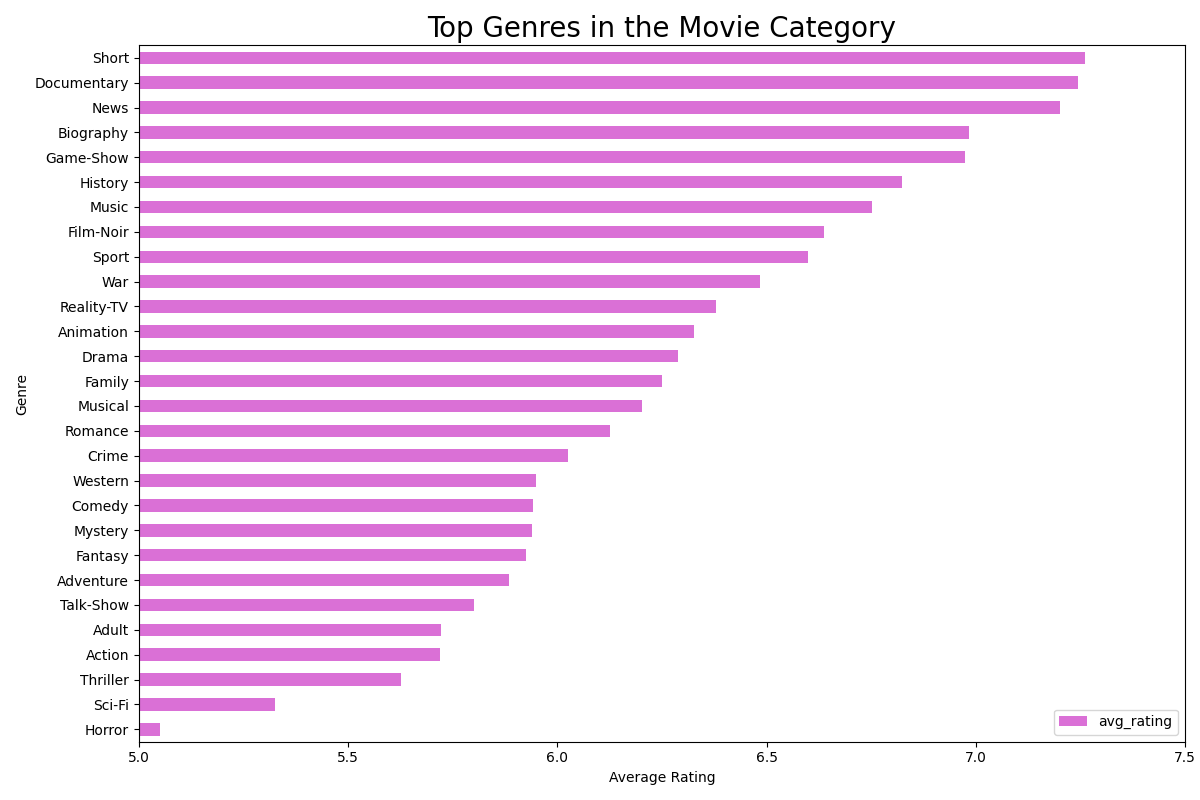

In [24]:
top_20_df = top_20_desc.toPandas()
top_20_df.sort_values(by='avg_rating',ascending=True).plot(
x='genre',
y='avg_rating',
kind='barh',
figsize=(12,8),
color='orchid')
plt.title('Top Genres in the Movie Category', fontsize=20)
plt.xlabel("Average Rating",fontsize=10)
plt.ylabel("Genre",fontsize=10)
plt.tight_layout()
plt.xlim(5,7.5)
%matplot plt

## PART 3 - Analyzing Job Categories

## Total Unique Job Categories

**What is the total number of unique job categories?**

In [25]:
principals.createOrReplaceTempView("principal")
category_df = spark.sql(
'''
SELECT tconst,category
FROM principal

''')
category_df.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+---------------+
|   tconst|       category|
+---------+---------------+
|tt0000001|           self|
|tt0000001|       director|
|tt0000001|cinematographer|
|tt0000002|       director|
|tt0000002|       composer|
+---------+---------------+
only showing top 5 rows

In [26]:
unique_category = spark.sql(
'''
SELECT distinct(category)
FROM principal

''')
unique_category.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

12

**What are the unique job categories available?**

In [27]:
unique_category.show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+
|category           |
+-------------------+
|actress            |
|producer           |
|production_designer|
|writer             |
|actor              |
|cinematographer    |
|archive_sound      |
|archive_footage    |
|self               |
|editor             |
|composer           |
|director           |
+-------------------+

## Top Job Categories

Now let's find the top job categories in this dataset by rolling up categories.

### Counts of Titles / Job Category

The expected output should be:

| category | count |
|-------------|------------|
| a     | 15         |
| b     | 2          |
| c     | 45          |

Or something to that effect.

In [28]:
spark.sql(
'''
SELECT category,COUNT(*) AS count
FROM principal
GROUP BY category
''').show(truncate=False)


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+-------+
|category           |count  |
+-------------------+-------+
|actress            |6325097|
|producer           |2197866|
|production_designer|285924 |
|writer             |4811596|
|actor              |8493701|
|cinematographer    |1300404|
|archive_sound      |2143   |
|archive_footage    |209035 |
|self               |6153089|
|editor             |1197669|
|composer           |1313187|
|director           |4179106|
+-------------------+-------+

### Bar Chart of Top Job Categories

With this data available, let us now build a barchart of the top 5 categories. 

**HINT**: don't forget about the matplotlib magic!

```
%matplot plt
```

In [29]:
spark.sql(
'''
SELECT category,COUNT(*) AS count
FROM principal
GROUP BY category
ORDER BY count DESC
''').show(truncate=False)


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+-------+
|category           |count  |
+-------------------+-------+
|actor              |8493701|
|actress            |6325097|
|self               |6153089|
|writer             |4811596|
|director           |4179106|
|producer           |2197866|
|composer           |1313187|
|cinematographer    |1300404|
|editor             |1197669|
|production_designer|285924 |
|archive_footage    |209035 |
|archive_sound      |2143   |
+-------------------+-------+

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

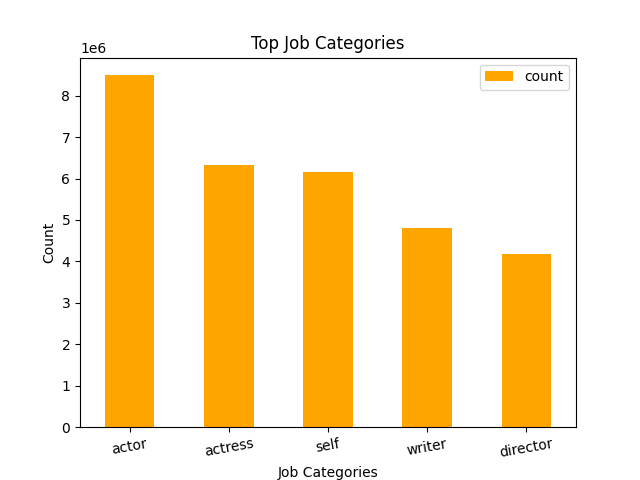

In [30]:
top5Job=spark.sql(
'''
SELECT category,COUNT(*) AS count
FROM principal
GROUP BY category
order by count DESC
limit 5
''')
top5Job_df=top5Job.toPandas()
top5Job_df.plot.bar(x='category',title='Top Job Categories',color='orange')
plt.xlabel("Job Categories",fontsize=10)
plt.ylabel("Count",fontsize=10)
plt.xticks(rotation=10, horizontalalignment="center")
%matplot plt

# PART 4 - Answer to the following questions:

## 1) Find all the "movies" featuring "Johnny Depp" and "Helena Bonham Carter".

First join actors, genres, and movie actors on each other

In [31]:
without=basics.select('tconst','titleType','genres','startYear','PrimaryTitle')
without=without.filter(without.genres != "\\N")
without=without.filter(without.startYear != "\\N")
without.createOrReplaceTempView("without")
actors.createOrReplaceTempView("actor")

sql=spark.sql(
'''
SELECT b.PrimaryTitle, b.titleType,a.primaryName,a.nconst,p.tconst
FROM without as b
inner join principal as p
on b.tconst=p.tconst
inner join actor as a
on a.nconst=p.nconst
WHERE b.titleType='movie' and a.primaryName='Helena Bonham Carter'                     
''')

sql2=spark.sql(
'''
SELECT b.PrimaryTitle, b.titleType,a.primaryName,a.nconst,p.tconst
FROM without as b
inner join principal as p
on b.tconst=p.tconst
inner join actor as a
on a.nconst=p.nconst
WHERE b.titleType='movie' and a.primaryName='Johnny Depp'                     
''')
sql.createOrReplaceTempView("sql")
sql2.createOrReplaceTempView("sql2")
spark.sql(
'''
SELECT s.PrimaryTitle
FROM sql as s
inner join sql2
on s.tconst=sql2.tconst
               
''').show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------------------------------------------+
|PrimaryTitle                                  |
+----------------------------------------------+
|Dark Shadows                                  |
|Sweeney Todd: The Demon Barber of Fleet Street|
|Alice Through the Looking Glass               |
|Alice in Wonderland                           |
|Charlie and the Chocolate Factory             |
|Corpse Bride                                  |
+----------------------------------------------+

## 2) Find all the "movies" featuring "Brad Pitt" after 2010.

In [32]:
spark.sql(
'''
SELECT b.primaryTitle,b.startYear
FROM basic as b
inner join principal as p
on b.tconst=p.tconst
inner join actor as a
on a.nconst=p.nconst
WHERE a.primaryName="Brad Pitt" and b.startYear>2010 and b.titleType='movie' 
ORDER BY b.startYear DESC
''').show(truncate=False)



VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------------------------------+---------+
|primaryTitle                     |startYear|
+---------------------------------+---------+
|Babylon                          |2021     |
|Irresistible                     |2020     |
|Kajillionaire                    |2020     |
|Ad Astra                         |2019     |
|Once Upon a Time ... in Hollywood|2019     |
|The King                         |2019     |
|Vice                             |2018     |
|War Machine                      |2017     |
|Voyage of Time: Life's Journey   |2016     |
|Allied                           |2016     |
|By the Sea                       |2015     |
|Hitting the Apex                 |2015     |
|The Big Short                    |2015     |
|Fury                             |2014     |
|Kick-Ass 2                       |2013     |
|World War Z                      |2013     |
|12 Years a Slave                 |2013     |
|Killing Them Softly              |2012     |
|The Tree of Life                 

## 3) What is the number of "movies" "acted" by "Zendaya" per year?

In [33]:
spark.sql(
'''
SELECT b.startYear,count(b.tconst) as count
FROM without as b
inner join principal as p
on b.tconst=p.tconst
inner join actor as a
on a.nconst=p.nconst
WHERE a.primaryName="Zendaya" and b.titleType='movie' 
Group by b.startYear                          
''').show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+-----+
|startYear|count|
+---------+-----+
|2020     |1    |
|2018     |2    |
|2017     |1    |
+---------+-----+

## 4) What are the "movies" by average rating greater than "9.7" and released in "2019"?

In [34]:
spark.sql(
'''
SELECT b.PrimaryTitle,averageRating
FROM without as b
inner join rating as r
on b.tconst=r.tconst
WHERE r.averageRating>9.7 and b.startYear='2019' and b.titleType='movie'
ORDER BY averageRating asc

''').show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------------------------------------+-------------+
|PrimaryTitle                                     |averageRating|
+-------------------------------------------------+-------------+
|A Grunt's Life                                   |10.0         |
|Kirket                                           |10.0         |
|Bu Can Var Oldugu Sürece                         |10.0         |
|L'Enfant Terrible                                |10.0         |
|The Butcher Baronet                              |10.0         |
|A Medicine for the Mind                          |10.0         |
|Our Scripted Life                                |10.0         |
|The Twilight Zone: A 60th Anniversary Celebration|10.0         |
|Love in Kilnerry                                 |10.0         |
|Kamen Rider Zi-O: Over Quartzer                  |9.8          |
|Gini Helida Kathe                                |9.8          |
|Time and motion                                  |9.8          |
|Square On

## Extra Credit - Analysis of your choice

Try and analyze some interesting dimension to this data. You should specify the question in your Project2_Analysis.ipynb. 

You must join at least two datasets.


# 5) What are the Top 5 "movies" by numvotes greater than 1.5 million and average rating greater than 8.5?

In [35]:
#change data type first
rating_df = ratings.withColumn("numvotes", col("numvotes").cast("Integer"))
rating_df = rating_df.withColumn("averageRating", col("averageRating").cast("Float"))
rating_df.createOrReplaceTempView("rating_df")
rating_df.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- tconst: string (nullable = true)
 |-- averageRating: float (nullable = true)
 |-- numvotes: integer (nullable = true)

In [36]:
spark.sql(
'''
SELECT b.PrimaryTitle,r.numvotes,r.averageRating
FROM without as b
inner join rating_df as r
on b.tconst=r.tconst
WHERE r.numvotes>1500000 and r.averageRating>8.5 and b.titleType='movie'
order by numvotes desc
Limit 5
''').show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------------------+--------+-------------+
|PrimaryTitle            |numvotes|averageRating|
+------------------------+--------+-------------+
|The Shawshank Redemption|2159745 |9.3          |
|The Dark Knight         |2134602 |9.0          |
|Inception               |1892958 |8.8          |
|Fight Club              |1725444 |8.8          |
|Pulp Fiction            |1695159 |8.9          |
+------------------------+--------+-------------+

# 6) How many movies have been released per year since 2000?

In [37]:
movies_peryear=spark.sql(
'''
SELECT startYear,count(b.tconst) as Total
FROM without as b
inner join rating_df as r
on b.tconst=r.tconst
WHERE b.titleType='movie' and startYear>=2000 and startYear<=2019
GROUP BY startYear
Order by startYear asc
''')
movies_peryear.show(truncate=False)


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+-----+
|startYear|Total|
+---------+-----+
|2000     |2880 |
|2001     |3079 |
|2002     |3276 |
|2003     |3490 |
|2004     |3912 |
|2005     |4385 |
|2006     |4862 |
|2007     |5080 |
|2008     |5727 |
|2009     |6504 |
|2010     |6769 |
|2011     |7336 |
|2012     |7660 |
|2013     |7977 |
|2014     |8382 |
|2015     |8534 |
|2016     |8777 |
|2017     |8893 |
|2018     |8182 |
|2019     |5371 |
+---------+-----+

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

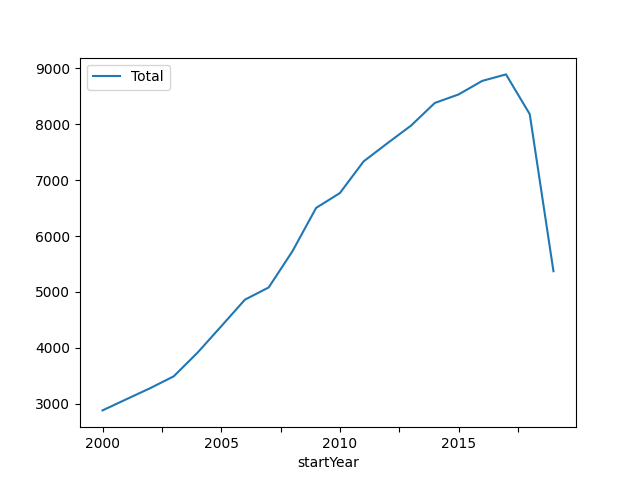

In [38]:
movies_peryear = movies_peryear.toPandas()
movies_peryear.plot.line(x="startYear", y="Total")
%matplot plt

# 7) What is the average number of votes per year since 2000?

In [39]:
avg_vote_peryear=spark.sql(
'''
SELECT startYear,avg(numvotes) as avg_num_of_votes
FROM without as b
inner join rating_df as r
on b.tconst=r.tconst
WHERE b.titleType='movie' and startYear>=2000 and startYear<=2019
GROUP BY startYear
Order by startYear ASC
''')
avg_vote_peryear.show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+------------------+
|startYear|avg_num_of_votes  |
+---------+------------------+
|2000     |6299.577083333334 |
|2001     |7027.099058135758 |
|2002     |6685.843101343101 |
|2003     |6429.0555873925505|
|2004     |6878.109151329243 |
|2005     |5559.932269099202 |
|2006     |5706.264294529001 |
|2007     |5800.278937007874 |
|2008     |5443.445433909551 |
|2009     |4614.460793357934 |
|2010     |4596.446890234894 |
|2011     |4548.010496183206 |
|2012     |4353.268276762402 |
|2013     |4566.240315908236 |
|2014     |4210.141016463851 |
|2015     |3163.5385516756505|
|2016     |3158.0945653412327|
|2017     |2631.9877431687846|
|2018     |2327.9615008555365|
|2019     |1646.7909141686837|
+---------+------------------+

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

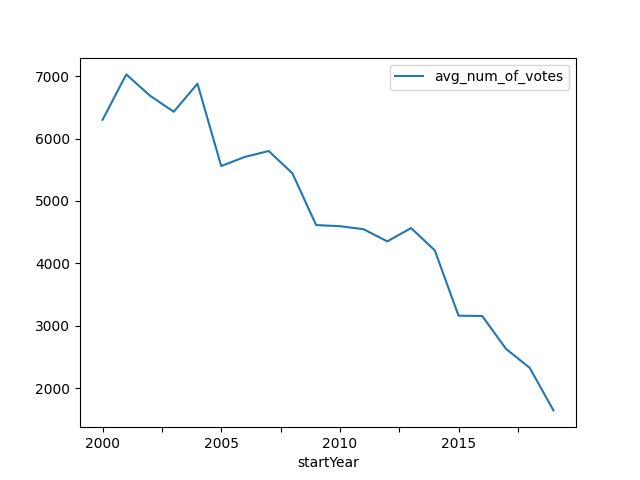

In [40]:
avg_vote_peryear = avg_vote_peryear.toPandas()
avg_vote_peryear.plot.line(x="startYear", y="avg_num_of_votes")
%matplot plt

# 8) What is the average rating of votes per year since 2000?

In [41]:
average_rating_peryear=spark.sql(
'''
SELECT startYear,avg(averageRating) as avg_rating
FROM without as b
inner join rating_df as r
on b.tconst=r.tconst
WHERE b.titleType='movie'and startYear>=2000 and startYear<=2019
GROUP BY startYear
Order by startYear asc
''')
average_rating_peryear.show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+------------------+
|startYear|avg_rating        |
+---------+------------------+
|2000     |6.034722218869461 |
|2001     |6.093894123566464 |
|2002     |6.135195361534463 |
|2003     |6.133094557240221 |
|2004     |6.215388550074554 |
|2005     |6.22159635264898  |
|2006     |6.176593996060331 |
|2007     |6.220413389238786 |
|2008     |6.2001571516435305|
|2009     |6.209578724951468 |
|2010     |6.226384990217767 |
|2011     |6.264462923616853 |
|2012     |6.274138384746198 |
|2013     |6.255120974070031 |
|2014     |6.280505848425836 |
|2015     |6.234614484645959 |
|2016     |6.300284838260843 |
|2017     |6.341515799146743 |
|2018     |6.251723297313675 |
|2019     |6.4932787226822715|
+---------+------------------+

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

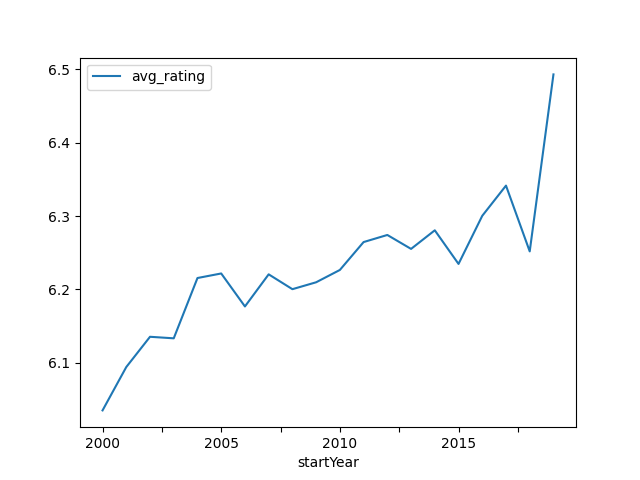

In [42]:
average_rating_peryear = average_rating_peryear.toPandas()
average_rating_peryear.plot.line(x="startYear", y="avg_rating")
%matplot plt

# 9) What are the top 20 good movies in 2019?
(I define good by the movie’s  average rating is greater than 2019 overall average rating and the movie's number of votes is greater than 2019 overall average number of votes  )

In [43]:
spark.sql(
'''
SELECT PrimaryTitle,averageRating,numvotes
FROM without as b
inner join rating_df as r
on b.tconst=r.tconst
WHERE b.titleType='movie'
and startYear=2019 
and  averageRating>(SELECT avg(averageRating) 
FROM without as b
inner join rating_df as r
on b.tconst=r.tconst
WHERE b.titleType='movie'and startYear=2019
 ) 
and numvotes>(SELECT avg(numvotes) 
FROM without as b
inner join rating_df as r
on b.tconst=r.tconst
WHERE b.titleType='movie'and startYear=2019)
ORDER BY averageRating desc,numvotes desc

''').show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-------------+--------+
|        PrimaryTitle|averageRating|numvotes|
+--------------------+-------------+--------+
|    Love in Kilnerry|         10.0|    2360|
|                Zana|          9.4|    3932|
|               Mosul|          9.1|    2643|
|         Little Baby|          9.0|    3987|
|              Kaithi|          8.9|    3076|
|      Saand Ki Aankh|          8.9|    1960|
|               Joker|          8.8|  466912|
|              Asuran|          8.8|    3918|
| The Blue Elephant 2|          8.8|    3819|
|        The Irishman|          8.7|    8992|
|              Jersey|          8.7|    3991|
|            Parasite|          8.6|   73962|
|   Kumbalangi Nights|          8.6|    4138|
|Agent Sai Sriniva...|          8.6|    3084|
|         Tell No One|          8.6|    2325|
|   Avengers: Endgame|          8.5|  602740|
|               Klaus|          8.5|    4490|
|Uri: The Surgical...|          8.4|   35278|
|        Super Deluxe|          8.